**Import Labraries**

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import pointbiserialr

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

**Data**

In [2]:
data = pd.read_csv("ifood_df.csv")
data.head(3)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0


In [3]:
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2205.0,51622.094785,20713.063826,1730.0,35196.0,51287.0,68281.0,113734.0
Kidhome,2205.0,0.442177,0.537132,0.0,0.0,0.0,1.0,2.0
Teenhome,2205.0,0.506576,0.544380,0.0,0.0,0.0,1.0,2.0
Recency,2205.0,49.009070,28.932111,0.0,24.0,49.0,74.0,99.0
MntWines,2205.0,306.164626,337.493839,0.0,24.0,178.0,507.0,1493.0
MntFruits,2205.0,26.403175,39.784484,0.0,2.0,8.0,33.0,199.0
MntMeatProducts,2205.0,165.312018,217.784507,0.0,16.0,68.0,232.0,1725.0
MntFishProducts,2205.0,37.756463,54.824635,0.0,3.0,12.0,50.0,259.0
MntSweetProducts,2205.0,27.128345,41.130468,0.0,1.0,8.0,34.0,262.0
MntGoldProds,2205.0,44.057143,51.736211,0.0,9.0,25.0,56.0,321.0


**Looking for missing values**

In [6]:
data.isna().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

**Assessing unique values**

In [7]:
data.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [8]:
data.drop(columns= ["Z_CostContact", "Z_Revenue"], inplace= True)

## Data Preparation and Cleaning

**Data Exploration**

Text(0, 0.5, 'MntTotal')

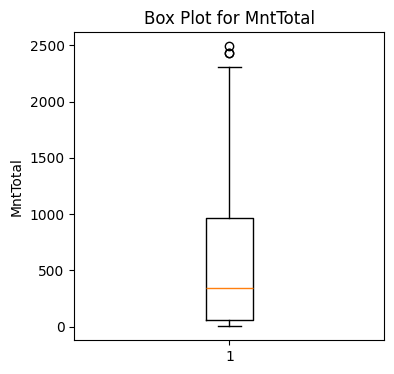

In [9]:
plt.figure(figsize= (4, 4))

plt.boxplot(data= data, x= "MntTotal")

plt.title("Box Plot for MntTotal")
plt.ylabel("MntTotal")

**Outliers**

In [10]:
Q_1 = data["MntTotal"].quantile(0.25)
Q_3 = data["MntTotal"].quantile(0.75)

IQR = Q_3 - Q_1

lower_bound = Q_1 - 1.5 * IQR
upper_bound = Q_3 + 1.5 * IQR

outliers = data[(data["MntTotal"] < lower_bound) | (data["MntTotal"] > upper_bound)]
outliers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,1,0,0,0,1,0,0,2491,2458,3
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1


**Outliers removal**

In [11]:
data = data[(data["MntTotal"] > lower_bound) & (data["MntTotal"] < upper_bound)]
data.info()
data.describe().T

<class 'pandas.core.frame.DataFrame'>
Index: 2202 entries, 0 to 2204
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2202 non-null   float64
 1   Kidhome               2202 non-null   int64  
 2   Teenhome              2202 non-null   int64  
 3   Recency               2202 non-null   int64  
 4   MntWines              2202 non-null   int64  
 5   MntFruits             2202 non-null   int64  
 6   MntMeatProducts       2202 non-null   int64  
 7   MntFishProducts       2202 non-null   int64  
 8   MntSweetProducts      2202 non-null   int64  
 9   MntGoldProds          2202 non-null   int64  
 10  NumDealsPurchases     2202 non-null   int64  
 11  NumWebPurchases       2202 non-null   int64  
 12  NumCatalogPurchases   2202 non-null   int64  
 13  NumStorePurchases     2202 non-null   int64  
 14  NumWebVisitsMonth     2202 non-null   int64  
 15  AcceptedCmp3          2202

,count,mean,std,min,25%,50%,75%,max
Income,2202.0,51570.283379,20679.438848,1730.0,35182.50,51258.5,68146.50,113734.0
Kidhome,2202.0,0.442779,0.537250,0.0,0.00,0.0,1.00,2.0
Teenhome,2202.0,0.507266,0.544429,0.0,0.00,0.0,1.00,2.0
Recency,2202.0,49.021344,28.944211,0.0,24.00,49.0,74.00,99.0
MntWines,2202.0,304.960036,336.135586,0.0,24.00,176.5,505.00,1493.0
MntFruits,2202.0,26.252044,39.589747,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2202.0,164.336058,216.312982,0.0,16.00,68.0,230.75,1725.0
MntFishProducts,2202.0,37.678474,54.821185,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2202.0,26.967302,40.926101,0.0,1.00,8.0,33.00,262.0
MntGoldProds,2202.0,44.014986,51.747221,0.0,9.00,25.0,56.00,321.0


C:\Users\Hediye\AppData\Local\Temp\ipykernel_9404\1277549092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= data, y= "Income", palette= "autumn")


Text(0, 0.5, 'Income')

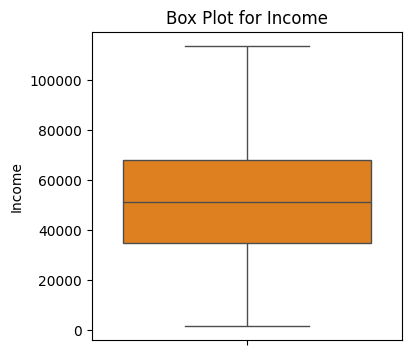

In [12]:
plt.figure(figsize= (4, 4))

sns.boxplot(data= data, y= "Income", palette= "autumn")

plt.title("Box Plot for Income")
plt.ylabel("Income")

Text(0, 0.5, 'Frequency')

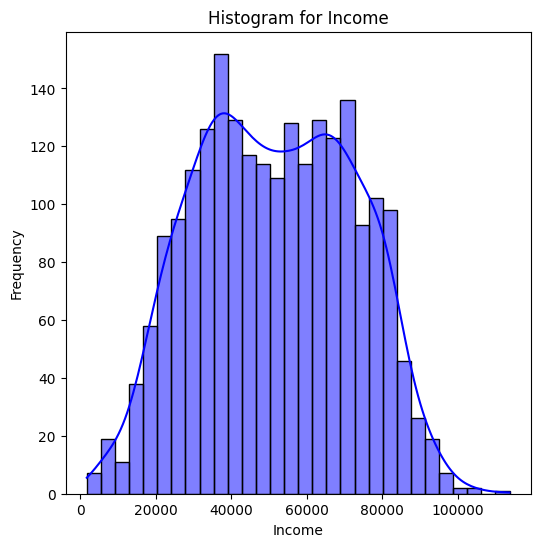

In [13]:
plt.figure(figsize= (6, 6))

sns.histplot(data= data, x= "Income", bins= 30, kde= True, color= "b")

plt.title("Histogram for Income")
plt.xlabel("Income")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

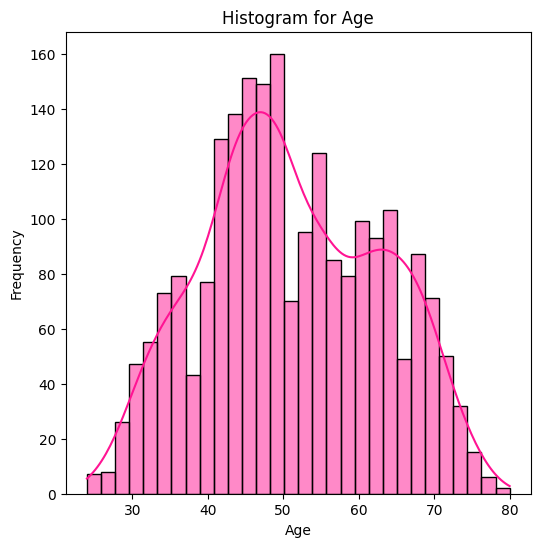

In [14]:
plt.figure(figsize= (6, 6))  

sns.histplot(data= data, x= "Age", bins= 30, kde= True, color= "deeppink")

plt.title("Histogram for Age")
plt.xlabel("Age")
plt.ylabel("Frequency")

In [15]:
col_demographics = ["Income", "Age"]
col_children = ["Kidhome", "Teenhome"]
col_marital = ["marital_Divorced", "marital_Married", "marital_Single", "marital_Together", "marital_Widow"]
col_mnt = ["MntTotal", "MntRegularProds", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
col_communication = ["Complain", "Response", "Customer_Days"]
col_campaigns = ["AcceptedCmpOverall", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]
col_source_of_purchase = ["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]
col_education = ["education_2n Cycle", "education_Basic", "education_Graduation", "education_Master", "education_PhD"]

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

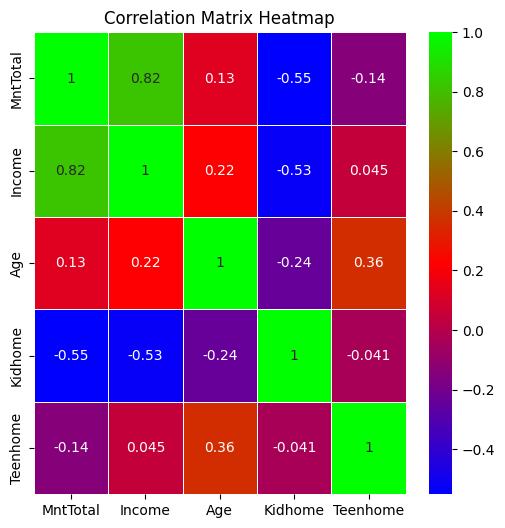

In [16]:
plt.figure(figsize= (6, 6))

corr_matrix = data[["MntTotal"] + col_demographics+ col_children].corr()

sns.heatmap(corr_matrix, annot= True, cmap= "brg", linewidths= 0.5)

plt.title("Correlation Matrix Heatmap")

In [17]:
for col in col_marital:
    correlation, p_value = pointbiserialr(data[col], data["MntTotal"])
    print(f"{correlation: 0.2f}: Point-Biserial Correlation for {col} with p-value {p_value: 0.2f}")

 0.01: Point-Biserial Correlation for marital_Divorced with p-value  0.80
-0.02: Point-Biserial Correlation for marital_Married with p-value  0.38
 0.00: Point-Biserial Correlation for marital_Single with p-value  0.96
 0.00: Point-Biserial Correlation for marital_Together with p-value  0.97
 0.04: Point-Biserial Correlation for marital_Widow with p-value  0.08


In [18]:
for col in col_education:
    correlation, p_value = pointbiserialr(data[col], data["MntTotal"])
    print(f"{correlation: 0.2f}: Point-Biserial Correlation for {col} with p-value {p_value: 0.2f}") 

-0.06: Point-Biserial Correlation for education_2n Cycle with p-value  0.01
-0.14: Point-Biserial Correlation for education_Basic with p-value  0.00
 0.02: Point-Biserial Correlation for education_Graduation with p-value  0.46
 0.00: Point-Biserial Correlation for education_Master with p-value  0.98
 0.07: Point-Biserial Correlation for education_PhD with p-value  0.00


**Feature Engineering**

In [19]:
def Marital_Status(row):
    if row["marital_Divorced"] == 1:
        return "Divorced"
    elif row["marital_Married"] == 1:
        return "Married"
    elif row["marital_Single"] == 1:
        return "Single"
    elif row["marital_Together"] == 1:
        return "Together"
    elif row["marital_Widow"] == 1:
        return "Widow"
    else:
        return "Unknown"
data["Marital"] = data.apply(Marital_Status, axis= 1)

C:\Users\Hediye\AppData\Local\Temp\ipykernel_9404\2482545729.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= data, x= "Marital", y= "MntTotal", palette= "gist_ncar")


Text(0, 0.5, 'MntTotal')

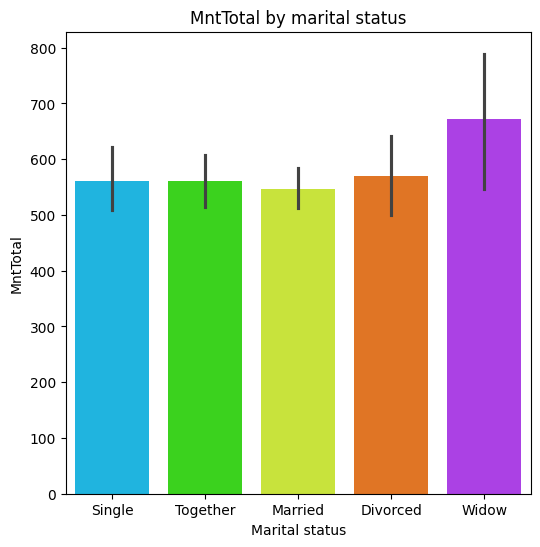

In [20]:
plt.figure(figsize= (6, 6))

sns.barplot(data= data, x= "Marital", y= "MntTotal", palette= "gist_ncar")

plt.title("MntTotal by marital status")
plt.xlabel("Marital status")
plt.ylabel("MntTotal")

In [21]:
def Relationship(row):
    if row["marital_Married"] == 1:
        return 1
    elif row["marital_Together"] == 1:
        return 1
    else:
        return 0
        
data["In_relationship"] = data.apply(Relationship, axis= 1)
data.head(3)    

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital,In_relationship
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529,1441,0,Single,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,15,0,Single,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734,692,0,Together,1


In [22]:
scaler = StandardScaler()

cols_for_clustering = ["Income", "MntTotal", "In_relationship"]

data_scaled = data.copy()
data_scaled[cols_for_clustering] = scaler.fit_transform(data[cols_for_clustering])

data_scaled[cols_for_clustering].describe()

,Income,MntTotal,In_relationship
count,2.202000e+03,2.202000e+03,2.202000e+03
mean,2.742785e-17,-8.873717e-17,-4.678869e-17
std,1.000227e+00,1.000227e+00,1.000227e+00
min,-2.410685e+00,-9.724232e-01,-1.348874e+00
25%,-7.926475e-01,-8.815089e-01,-1.348874e+00
50%,-1.508040e-02,-3.806058e-01,7.413589e-01
75%,8.017617e-01,7.024988e-01,7.413589e-01
max,3.006747e+00,3.048788e+00,7.413589e-01


In [23]:
pca = PCA(n_components = 2)

pca_res = pca.fit_transform(data_scaled[cols_for_clustering])
data_scaled["pc1"] = pca_res[:, 0]
data_scaled["pc2"] = pca_res[:, 1]

In [24]:
X = data_scaled[cols_for_clustering]

inertia_list = []

for K in range(2, 10):
    inertia = KMeans(n_clusters= K, random_state= 7).fit(X).inertia_
    inertia_list.append(inertia)

C:\Users\Hediye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hediye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hediye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hediye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\

Text(0, 0.5, 'Inertia')

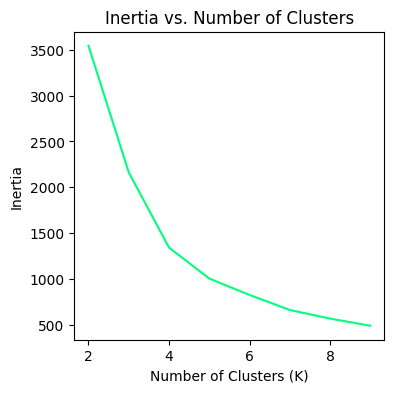

In [25]:
plt.figure(figsize= (4, 4))

plt.plot(range(2, 10), inertia_list, color= "springgreen")

plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")

C:\Users\Hediye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hediye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hediye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hediye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\

Text(0, 0.5, 'Silhouette Score')

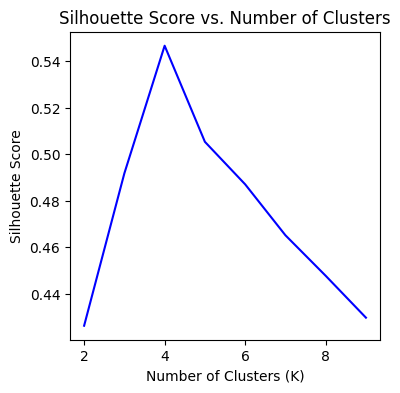

In [26]:
silhouette_list = []

for K in range(2, 10):
    model = KMeans(n_clusters = K, random_state= 45)
    clusters = model.fit_predict(X)
    s_avg = silhouette_score(X, clusters)
    silhouette_list.append(s_avg)

plt.figure(figsize= (4, 4))
plt.plot(range(2, 10), silhouette_list, color= "b")

plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")

In [27]:
model = KMeans(n_clusters= 4, random_state = 45)
model.fit(data_scaled[cols_for_clustering])
data_scaled["Cluster"] = model.predict(data_scaled[cols_for_clustering])

C:\Users\Hediye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


**Visualisation of clusters**

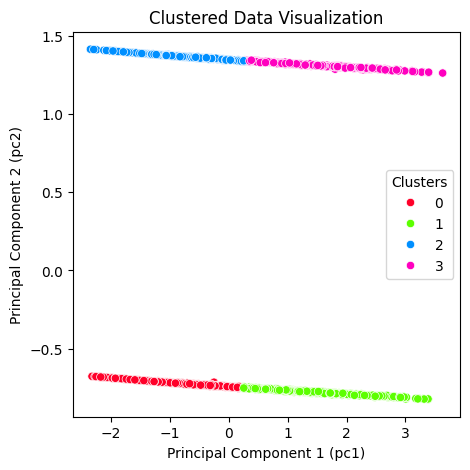

In [28]:
plt.figure(figsize= (5, 5))

sns.scatterplot(data= data_scaled, x= "pc1", y= "pc2", hue= "Cluster", palette= "gist_rainbow")

plt.title("Clustered Data Visualization")
plt.xlabel("Principal Component 1 (pc1)")
plt.ylabel("Principal Component 2 (pc2)")
plt.legend(title= "Clusters")

In [29]:
data["Cluster"] = data_scaled.Cluster
data.groupby("Cluster")[cols_for_clustering].mean()

,Income,MntTotal,In_relationship
Cluster,,,
0,37892.819883,158.463158,1.0
1,71818.929329,1147.372792,1.0
2,37332.339956,150.761589,0.0
3,71946.155488,1159.612805,0.0


In [30]:
mnt_data = data.groupby("Cluster")[col_mnt].mean().reset_index()
mnt_data.head()

,Cluster,MntTotal,MntRegularProds,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,158.463158,133.962573,92.046784,7.640936,39.438596,11.423392,7.913450,24.500585
1,1,1147.372792,1076.279152,623.261484,52.489399,341.326855,75.577739,54.717314,71.093640
2,2,150.761589,125.662252,85.450331,7.832230,38.774834,10.971302,7.732892,25.099338
3,3,1159.612805,1085.332317,613.862805,54.929878,357.902439,77.603659,55.314024,74.280488


C:\Users\Hediye\AppData\Local\Temp\ipykernel_9404\89793810.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data= melted_data, x= "Cluster", y= "Consumption", hue= "Product", ci= None, palette= "gnuplot2")


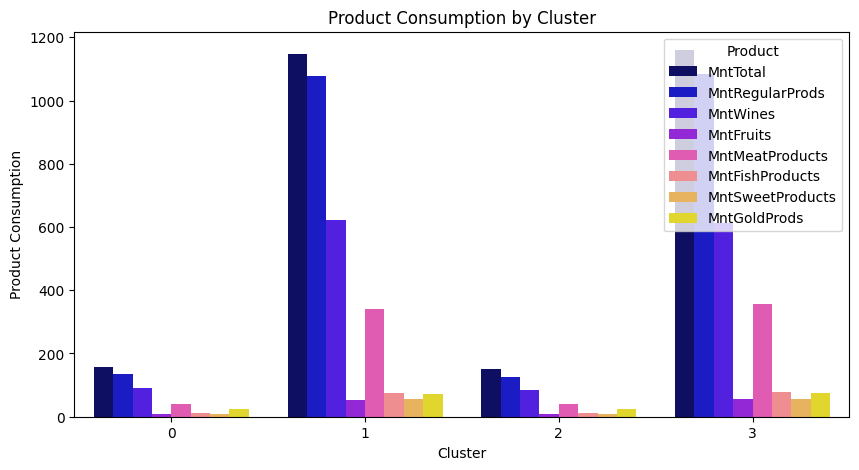

In [31]:
plt.figure(figsize= (10, 5))


melted_data = pd.melt(mnt_data, id_vars= "Cluster", var_name= "Product", value_name= "Consumption")
sns.barplot(data= melted_data, x= "Cluster", y= "Consumption", hue= "Product", ci= None, palette= "gnuplot2")

plt.title("Product Consumption by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Product Consumption")
plt.xticks(rotation= 0)  
plt.legend(title="Product", loc="upper right")

C:\Users\Hediye\AppData\Local\Temp\ipykernel_9404\1349655808.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_sizes, x= "Cluster", y= "MntTotal",  palette = "hsv")


Text(0, 0.5, 'MntTotal')

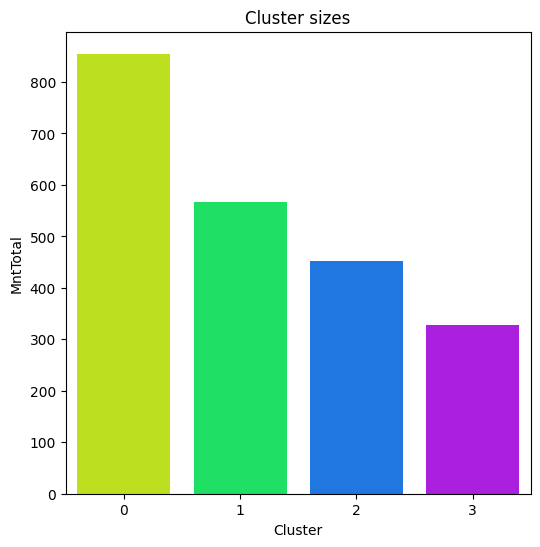

In [32]:
plt.figure(figsize= (6, 6))

cluster_sizes = data.groupby("Cluster")[["MntTotal"]].count().reset_index()
sns.barplot(data=cluster_sizes, x= "Cluster", y= "MntTotal",  palette = "hsv")

plt.title("Cluster sizes")
plt.xlabel("Cluster")
plt.ylabel("MntTotal")

In [33]:
total_rows = len(data)
cluster_sizes["Share%"] = round(cluster_sizes["MntTotal"] / total_rows * 100, 0)
cluster_sizes.head()

,Cluster,MntTotal,Share%
0,0,855,39.0
1,1,566,26.0
2,2,453,21.0
3,3,328,15.0


C:\Users\Hediye\AppData\Local\Temp\ipykernel_9404\3880740954.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= data, x= "Cluster", y= "Income", palette= "nipy_spectral")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


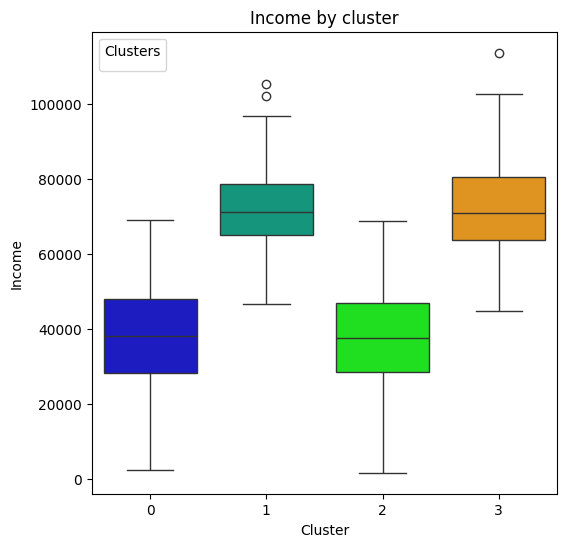

In [34]:
plt.figure(figsize= (6, 6))

sns.boxplot(data= data, x= "Cluster", y= "Income", palette= "nipy_spectral")

plt.title("Income by cluster")
plt.xlabel("Cluster")
plt.ylabel("Income")
plt.legend(title= "Clusters")

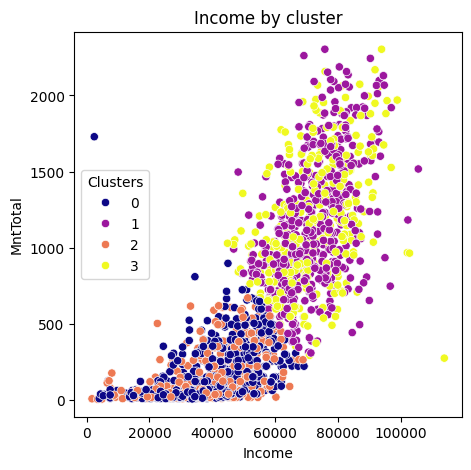

In [35]:
plt.figure(figsize= (5, 5))

sns.scatterplot(data= data, x= "Income", y= "MntTotal", hue = "Cluster", palette= "plasma")

plt.title("Income by cluster")
plt.xlabel("Income")
plt.ylabel("MntTotal")
plt.legend(title= "Clusters")

C:\Users\Hediye\AppData\Local\Temp\ipykernel_9404\3623385068.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= data, x= "Cluster", y= "In_relationship", palette= "spring")


Text(0, 0.5, 'In_relationship')

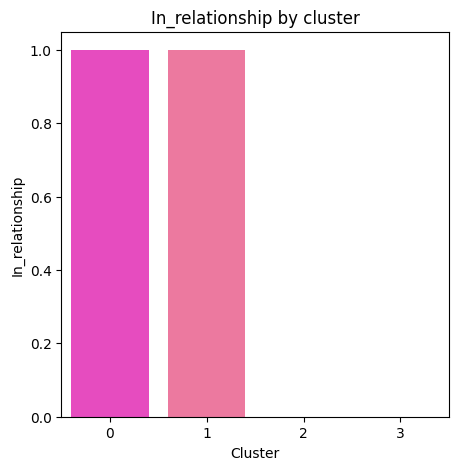

In [36]:
plt.figure(figsize= (5, 5))

sns.barplot(data= data, x= "Cluster", y= "In_relationship", palette= "spring")

plt.title("In_relationship by cluster")
plt.xlabel("Cluster")
plt.ylabel("In_relationship")